# 1. Business Understanding

#### 1.1. Project Overview

Tanzania is a country with a population of 57 million. It faces significant challenges in providing clean and reliable water to its population.
The country has established numerous water points to meet this need but many of these water points are not fully functional, with some requiring repairs and others have failed entirely.
This project aims to predict the functionality of these water pumps, distingishing between those that are fully functional, those that need repairs and those that do not work at all

#### 2.1. Objective
The primary objective is to develop a predictive model that can accurately classify the operational status of water pumps into one of three categories:
- Functional: The water pump is fully operational and provides clean water.
- Needs repair: The water pump is operational but requires some maintenance or repair to ensure optimal performance.
- Non-Functional: The water pump has failed and is not providing water.

#### 3.1. Stakeholders
- Non-Governmental Organizations(NGOs): Various NGOs involved in providing support for wells needing repairs in Tanzania
- Government of Tanzania throught the Tanzanian Ministry of Water: The government is looking to find patterns in non-functional wells to influence how new wells are built

#### 4.1. Key Questions
1. What are the critical factors influencing the functionality of water pumps in Tanzania?
2. How can we use historical data to predict the current operational status of a water pump?
3. What are the cost implications of accurately predicting pump functionality?
4. How can this model be intergrated into existing maintenance workflows to maximize its impact?


# 2. Data Understanding

#### Import the necessary python packages

In [1]:
import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.impute import SimpleImputer
# import numpy as np
# from scipy.stats import zscore

#### Loading the Data

In [13]:
# Viewing the first five rows of the dataset

# Load data
train_values = pd.read_csv('Data/Training-set-values.csv')
train_labels = pd.read_csv('Data/Training-set-labels.csv')

# Display the first few rows of the train-values dataset
print("Train Values:")
display(train_values.head())

# Display the first few rows of the train-labels dataset
print("\nTrain Labels:")
display(train_labels.head())

# Check the shape of the datasets
print("\nShape of Train Values:", train_values.shape)
print("Shape of Train Labels:", train_labels.shape)

Train Values:


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe



Train Labels:


,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional



Shape of Train Values: (59400, 40)
Shape of Train Labels: (59400, 2)


##### Key Insights:
- Based on the above, I can confirm that we have a large dataset with 59,400 water points, which is good for training a predictive model.
- The datatset includes various types of features, such as numerical, categorical and geographical
- I have also identified that `status_group` is my primary target variable


#### Generating summary statistics 

In [3]:

# Summary statistics for numerical variables
numerical_summary = train_data.describe()

# Summary statistics for categorical variables
categorical_summary = train_data.describe(include=['object'])

# Check for missing values
missing_values = train_data.isnull().sum()
missing_percentage = (missing_values / len(train_data)) * 100

#Display
print("Numerical Summary : \n", numerical_summary)
print("\nCategorical Summary : \n", categorical_summary)
print("\nMissing Values:\n", missing_values)
print("\nMissing Percentage:\n", missing_percentage)

Numerical Summary : 
                  id     amount_tsh    gps_height     longitude      latitude  \
count  59400.000000   59400.000000  59400.000000  59400.000000  5.940000e+04   
mean   37115.131768     317.650385    668.297239     34.077427 -5.706033e+00   
std    21453.128371    2997.574558    693.116350      6.567432  2.946019e+00   
min        0.000000       0.000000    -90.000000      0.000000 -1.164944e+01   
25%    18519.750000       0.000000      0.000000     33.090347 -8.540621e+00   
50%    37061.500000       0.000000    369.000000     34.908743 -5.021597e+00   
75%    55656.500000      20.000000   1319.250000     37.178387 -3.326156e+00   
max    74247.000000  350000.000000   2770.000000     40.345193 -2.000000e-08   

        num_private   region_code  district_code    population  \
count  59400.000000  59400.000000   59400.000000  59400.000000   
mean       0.474141     15.297003       5.629747    179.909983   
std       12.236230     17.587406       9.633649    471.482

Based on the above summary we can better understand our data as follows:
- `amount_tsh` has a median of 0.0 which indicates that many water points have an `amount_tsh` of 0
- We also see there is outliers in our data as indicated by the max_value of `amount_tsh` being 350,000
- `population` median is indicated as 25 which indicates many water points serve small populations


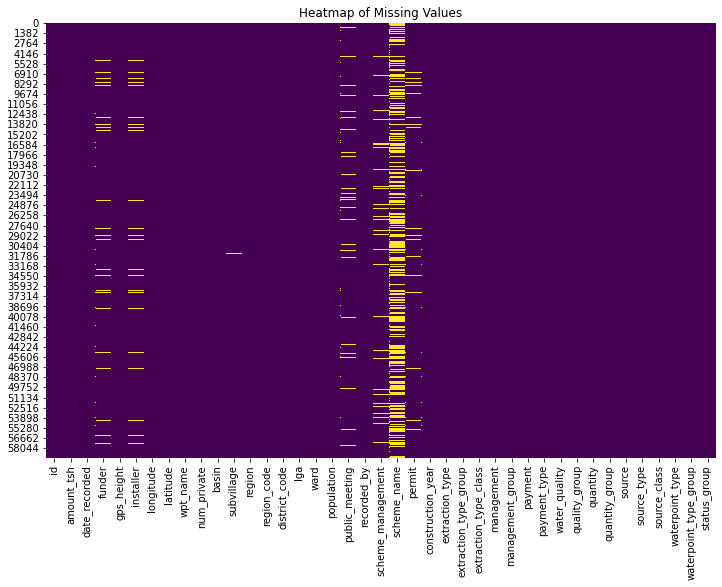

In [4]:

# Create a heatmap to visualize missing data
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

From the above heatmap, we can see that `scheme_name` has significant number of missing values and this needs to be addressed.

In [5]:
train_data['scheme_name'].fillna('Unknown', inplace=True)
train_data['subvillage'].fillna('Unknown', inplace=True)

Since `scheme_name` has a high number of missing values, I have decided to fill the missing values with 'Unknown'

In [6]:

# Mode imputation
imputer = SimpleImputer(strategy='most_frequent')
train_data[['funder', 'installer', 'public_meeting', 'scheme_management', 'permit']] = imputer.fit_transform(train_data[['funder', 'installer', 'public_meeting', 'scheme_management', 'permit']])


Since `funder` , `installer`, `public_meeting`, `scheme_management` and `permit` are all categorical variables, I have decided to use mode to fill the missing values of the rows.

In [7]:
# Check for missing values
missing_values = train_data.isnull().sum()
missing_values

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
s

From the above we can confidently see that there are no missing values in our dataset

#### Checking for Skewness in data

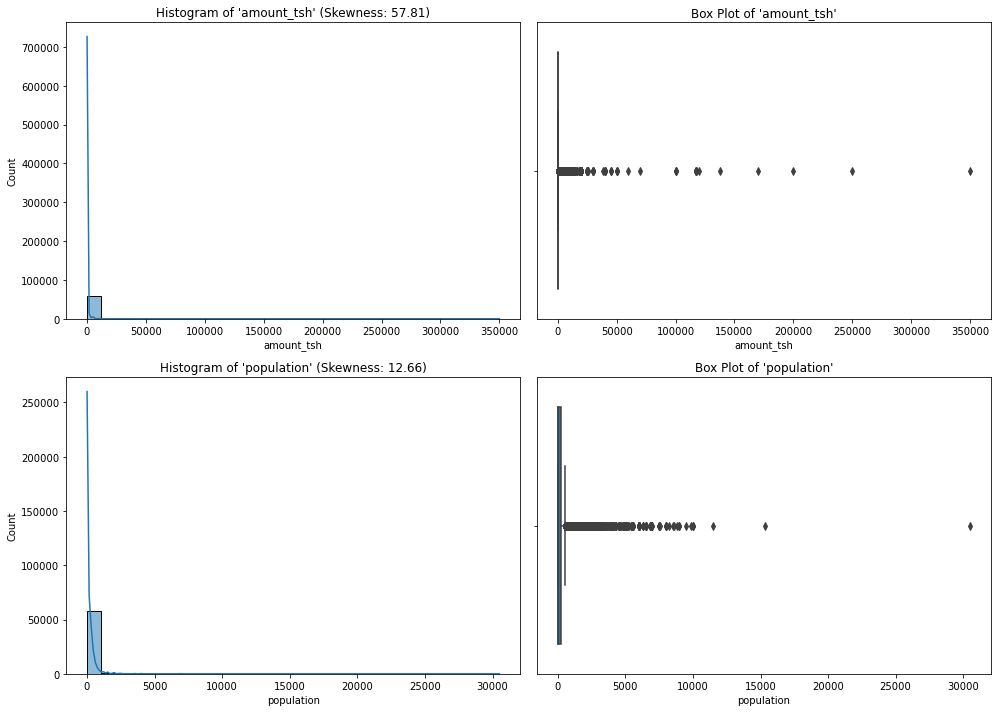

(id                    0.002623
 amount_tsh           57.807800
 gps_height            0.462402
 longitude            -4.191046
 latitude             -0.152037
 num_private          91.933750
 region_code           3.173818
 district_code         3.962045
 population           12.660714
 public_meeting       -2.973921
 permit               -0.901815
 construction_year    -0.634928
 dtype: float64,
 11161)

In [10]:

np.random.seed(0)

# Calculate skewness
skewness = train_data.skew()

# Calculate Z-scores for outliers detection in 'amount_tsh'
train_data['z_score_amount_tsh'] = zscore(train_data['amount_tsh'])

# Define outliers using IQR method for 'amount_tsh'
Q1 = train_data['amount_tsh'].quantile(0.25)
Q3 = train_data['amount_tsh'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = train_data[(train_data['amount_tsh'] < lower_bound) | (train_data['amount_tsh'] > upper_bound)]

# Plot histograms and box plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram for 'amount_tsh'
sns.histplot(train_data['amount_tsh'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title(f"Histogram of 'amount_tsh' (Skewness: {skewness['amount_tsh']:.2f})")

# Box plot for 'amount_tsh'
sns.boxplot(x=train_data['amount_tsh'], ax=axes[0, 1])
axes[0, 1].set_title("Box Plot of 'amount_tsh'")

# Histogram for 'population'
sns.histplot(train_data['population'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title(f"Histogram of 'population' (Skewness: {skewness['population']:.2f})")

# Box plot for 'population'
sns.boxplot(x=train_data['population'], ax=axes[1, 1])
axes[1, 1].set_title("Box Plot of 'population'")

plt.tight_layout()
plt.show()

# Output key information
skewness, outliers_iqr.shape[0]


In the above I was understanding the skewness of the `amount_tsh`, `num_private` and `population` as well as its presence of outliers. while `amount_tsh` detected 11,161 outliers

# 3. Data Preparation

In this section we will be preparing the data to be used address skewness of data and handling of outliers